In [43]:
import pandas as pd
import numpy as np
df = pd.read_csv('automobile.csv')
df['price'].replace('?', np.nan, inplace=True)
df['price'] = df['price'].astype(float)

df['horsepower'].replace('?', np.nan, inplace=True)
df['horsepower'] = df['horsepower'].astype(float)
df.head()

C:\Users\TobiasUlrich\AppData\Local\Temp\ipykernel_15756\2558960891.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].replace('?', np.nan, inplace=True)
C:\Users\TobiasUlrich\AppData\Local\Temp\ipykernel_15756\2558960891.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0


In [3]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [4]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

<Axes: title={'center': 'price'}, xlabel='drive-wheels'>

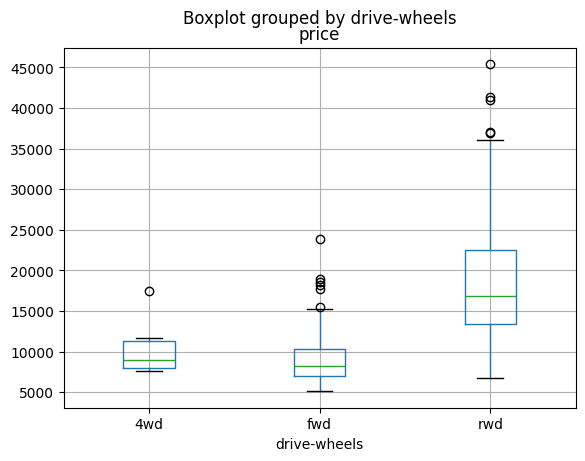

In [14]:
df.boxplot(column='price', by='drive-wheels')

In [27]:
df_sel = df[['drive-wheels', 'price', 'body-style']]
df_grouped = df_sel.groupby(['drive-wheels', 'body-style'], as_index=False).mean().round(2)
df_grouped.head(10)

,drive-wheels,body-style,price
0,4wd,hatchback,7603.00
1,4wd,sedan,12647.33
2,4wd,wagon,9095.75
3,fwd,convertible,11595.00
4,fwd,hardtop,8249.00
5,fwd,hatchback,8396.39
6,fwd,sedan,9811.80
7,fwd,wagon,9997.33
8,rwd,convertible,23949.60
9,rwd,hardtop,24202.71


In [28]:
df_pivot = df_grouped.pivot(index='drive-wheels', columns='body-style', values='price')
df_pivot

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,7603.00,12647.33,9095.75
fwd,11595.0,8249.00,8396.39,9811.80,9997.33
rwd,23949.6,24202.71,14337.78,21711.83,16994.22


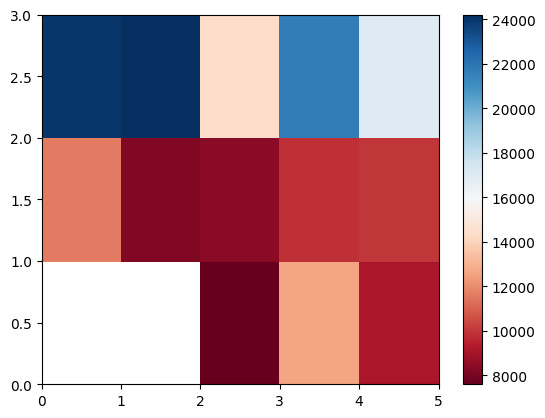

In [31]:
import matplotlib.pyplot as plt
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<Axes: xlabel='body-style', ylabel='drive-wheels'>

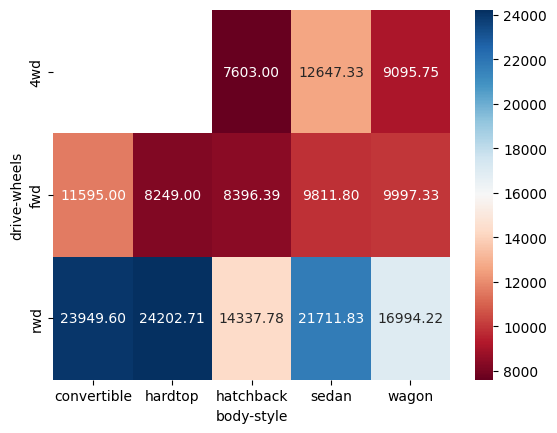

In [33]:
import seaborn as sns
sns.heatmap(df_pivot, annot=True, fmt='.2f', cmap='RdBu')

<Axes: xlabel='engine-size', ylabel='price'>

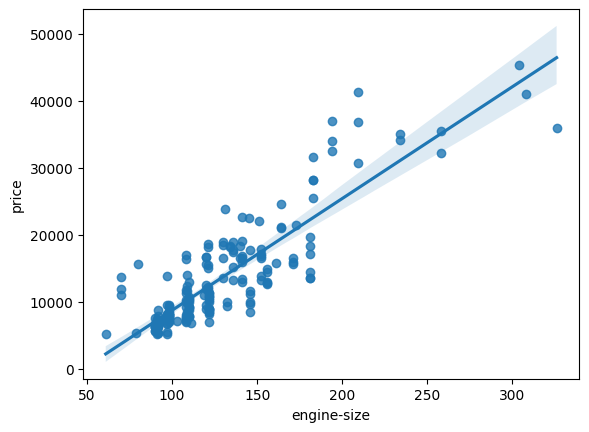

In [35]:
sns.regplot(x='engine-size', y='price', data=df)

<Axes: xlabel='highway-mpg', ylabel='price'>

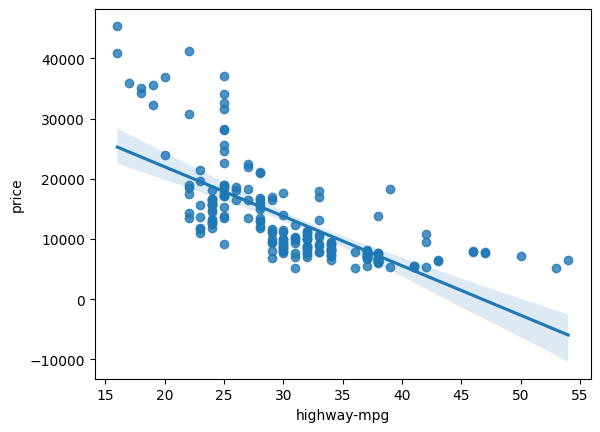

In [36]:
sns.regplot(x='highway-mpg', y='price', data=df)

In [49]:
from scipy import stats
df.dropna(inplace=True)
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print(f'Pearson Correlation Coefficient: {pearson_coef:.2f}\nP-value: {p_value:.5f}')

Pearson Correlation Coefficient: 0.81
P-value: 0.00000


In [52]:
df[['horsepower', 'price']].corr()

,horsepower,price
horsepower,1.000000,0.810533
price,0.810533,1.000000
